In [2]:
using Pkg
Pkg.activate("..")
using Revise
using FUSE
using ProfileSVG
using Plots; gr();
println("done loading")

done loading


  Activating project at `~/.julia/dev/FUSE`
┌ Info: Precompiling FUSE [e64856f0-3bb8-4376-b4b7-c03396503992]
└ @ Base loading.jl:1423


In [6]:
function run_case(data_row)
    dd=IMAS.dd()
    ini,act=FUSE.case_parameters(data_row)
    return simple_equilibrium_transport_workflow(dd, ini, act)
end
pmap
db = FUSE.load_hdb5()[1:5,:]
OUTS=pmap(run_case,[db[k] for k in 1:length(db.TOK)])

LoadError: ArgumentError: syntax df[column] is not supported use df[!, column] instead

In [24]:
dd,ini,act = FUSE.init(:FPP,init_from=:gasc,version=:v1)
FUSE.par2json(ini,"/Users/timslendebroek/test_output/tmp.json")
display(ini)
#FUSE.simple_equilibrium_transport_workflow(dd,ini,act,do_plot=true) ;



build
  blanket ➡ missing
  layers ➡ OrderedCollections.OrderedDict{Any, Any}("gap_OH" => 1.185628912341008, "OH" => 0.35004881123961695, "hfs_gap_TF_OH" => 0.06891818067288868, "hfs_TF" => 0.3074033273908423, "hfs_gap_low_temp_shield_TF" => 0.06891818067288868, "hfs_low_temp_shield" => 0.4241901854016934, "hfs_gap_vacuum_vessel_low_temp_shield" => 0.06891818067288868, "hfs_vacuum_vessel" => 0.17229545168222193, "hfs_gap_high_temp_shield_vacuum_vessel" => 0.06891818067288868, "hfs_high_temp_shield" => 0.2067545420186665, "hfs_blanket" => 0.35161962919661294, "hfs_gap_plasma_blanket" => 0.17229545168222193, "plasma" => 2.756727226915551, "lfs_gap_plasma_blanket" => 0.17229545168222238, "lfs_blanket" => 0.7854012311802618, "lfs_high_temp_shield" => 0.2067545420186665, "lfs_gap_high_temp_shield_vacuum_vessel" => 0.9671534424758628, "lfs_vacuum_vessel" => 0.17229545168222238, "lfs_gap_vacuum_vessel_low_temp_shield" => 0.06891818067288824, "lfs_low_temp_shield" => 0.4241901854016934, "lfs_g

In [28]:
db = FUSE.load_hdb5()[1:5,:]
db[:,"TAUTH_fuse"] = zeros(length(db.TOK))
db[:,"T0_fuse"] = zeros(length(db.TOK))
#outs =  @time OUTS=pmap(FUSE.run_HDB5_from_data_row,[db[k,:] for k in 1:length(db.TOK)])
db[1,"TAUTH_fuse"] = NaN
#@show datarow.TAUTH, datarow.TAUTH_fuse

┌ Error: Failed to revise /Users/timslendebroek/.julia/dev/FUSE/cases/HDB5.jl
│   exception = (LoadError("/Users/timslendebroek/.julia/dev/FUSE/cases/HDB5.jl", 20, "try without catch or finally"), Union{Ptr{Nothing}, Base.InterpreterIP}[Ptr{Nothing} @0x000000013168edbb])
└ @ Revise /Users/timslendebroek/.julia/packages/Revise/VskYC/src/packagedef.jl:710
┌ Warning: The running code does not match the saved version for the following files:
│ 
│   /Users/timslendebroek/.julia/dev/FUSE/cases/HDB5.jl
│ 
│ If the error was due to evaluation order, it can sometimes be resolved by calling `Revise.retry()`.
│ Use Revise.errors() to report errors again. Only the first error in each file is shown.
│ Your prompt color may be yellow until the errors are resolved.
└ @ Revise /Users/timslendebroek/.julia/packages/Revise/VskYC/src/packagedef.jl:818


NaN

In [11]:
function run_case(data_row)
    dd=IMAS.dd()
    ini,act=FUSE.case_parameters(data_row)
    return FUSE.simple_equilibrium_transport_workflow(dd, ini, act)
end
function slow(x::Float64)
           a = 1.0
           for i in 1:100
               for j in 1:500
                   a+=asinh(i+j)
               end
           end
           return a
       end

db = FUSE.load_hdb5()[1:5,:]
#@time pmap(slow,LinRange(1,1000,1000)) ;
 @time OUTS=map(run_case,[db[k,:] for k in 1:length(db.TOK)])

LoadError: UndefVarError: pmap not defined

build
  blanket ➡ missing
  layers ➡ missing
  shield ➡ missing
  symmetric ➡ missing
  vessel ➡ missing
center_stack
  bucked ➡ false
  noslip ➡ false
  plug ➡ false
core_profiles
  T_shaping ➡ 1.8
  bulk ➡ :D
  ejima ➡ 0.4
  impurity ➡ :C
  n_peaking ➡ 1.5
  ne_ped ➡ 9.9e18 [m^-3]
  ngrid ➡ 201
  rot_core ➡ 50000.0 [s^-1]
  w_ped ➡ 0.03
  zeff ➡ 3.129
ec
  power_launched ➡ missing
equilibrium
  B0 ➡ 2.974 [T]
  R0 ➡ 2.862 [m]
  Z0 ➡ 0.0 [m]
  area ➡ 6.372 [m²]
  field_null_surface ➡ 0.25
  ip ➡ -3.104e6 [A]
  ngrid ➡ 129
  symmetric ➡ true
  volume ➡ 114.6 [m³]
  x_point ➡ (2.36039582, 2.1752808000000003)
  βn ➡ 1.0 [-]
  δ ➡ 0.4123 [-]
  κ ➡ 1.788 [-]
  ϵ ➡ 0.3864430468204053
gasc
  case ➡ missing
  filename ➡ missing
  no_small_gaps ➡ true
general
  casename ➡ "HDB_JET_21906"
  init_from ➡ :scalars
ic
  power_launched ➡ 27590.0 [W]
lh
  power_launched ➡ missing
material
  blanket ➡ missing
  shield ➡ missing
  wall ➡ "Steel, Stainless 316"
nbi
  beam_energy ➡ missing
  beam_mass ➡ 

"38.983 KeV ==> cost 1.55e+01"

"62.289 KeV ==> cost 1.45e+01"

"76.694 KeV ==> cost 4.43e+01"

"53.387 KeV ==> cost 6.59e-01"

"47.885 KeV ==> cost 6.34e+00"

"56.788 KeV ==> cost 5.57e+00"

"51.286 KeV ==> cost 2.15e+00"

"54.686 KeV ==> cost 2.48e+00"

"52.585 KeV ==> cost 4.33e-01"

"52.088 KeV ==> cost 1.10e+00"

"52.585 KeV ==> cost 4.33e-01"

error = 0.01
eped_factor = 1
rho_fluxmatch = 0.6
T_shaping = 1.8
temp_pedestal_ratio = 1.0
transport_model = tglfnn
warn_nn_train_bounds = true


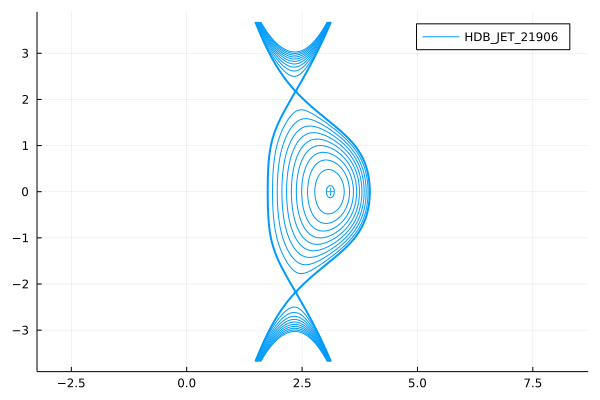

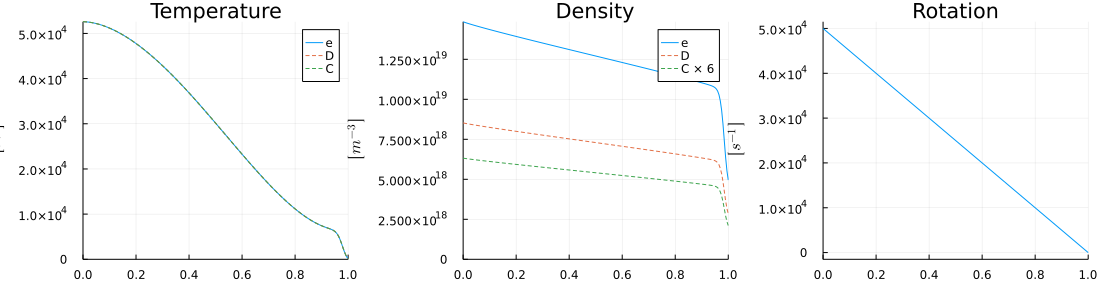

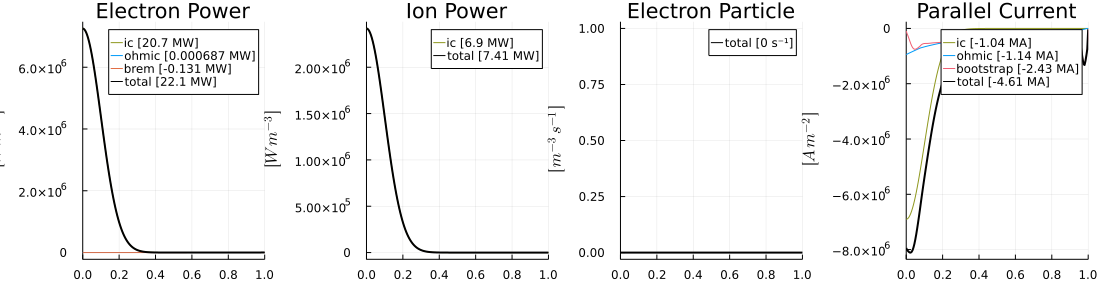

DataFrameRow
 Row │ TOK      SHOT   AMIN     KAPPA    DELTA     NEL       ZEFF      TAUTH     AUXHEAT  RGEO     BT       IP        PNBI      ENBI      PICRH    PECRH    POHM      MEFF     VOL      AREA      WTH       CONFIG  
     │ String7  Int64  Float64  Float64  Float64?  Float64?  Float64?  Float64?  String7  Float64  Float64  Float64   Float64?  Float64?  Float64  Float64  Float64?  Float64  Float64  Float64?  Float64?  String7 
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
 500 │ JET      21906    1.106    1.788    0.4123  1.287e19     3.129    0.5893  IC         2.862    2.974  -3.104e6       0.0       0.0  27590.0      0.0   1.707e6      2.0    114.6     6.372  890800.0  DNResults of Optimization Algorithm
 * Algorithm: Golden Section Search
 * Search Interval: [1272.542549, 100000.000000]
 * Minimizer: 5.258450e

┌ Warning: Extrapolation warning on XNUE_log10=-3.373303517331027 is below bound of -3.1857896
└ @ TGLFNN /Users/timslendebroek/.julia/dev/TGLFNN/src/TGLFNN.jl:79
┌ Warning: Extrapolation warning on XNUE_log10=-3.693120735237301 is below bound of -3.1857896
└ @ TGLFNN /Users/timslendebroek/.julia/dev/TGLFNN/src/TGLFNN.jl:79
┌ Warning: Extrapolation warning on XNUE_log10=-3.8435597338861696 is below bound of -3.1857896
└ @ TGLFNN /Users/timslendebroek/.julia/dev/TGLFNN/src/TGLFNN.jl:79
┌ Warning: Extrapolation warning on XNUE_log10=-3.5847287328620605 is below bound of -3.1857896
└ @ TGLFNN /Users/timslendebroek/.julia/dev/TGLFNN/src/TGLFNN.jl:79
┌ Warning: Extrapolation warning on XNUE_log10=-3.5100669909713234 is below bound of -3.1857896
└ @ TGLFNN /Users/timslendebroek/.julia/dev/TGLFNN/src/TGLFNN.jl:79
┌ Warning: Extrapolation warning on XNUE_log10=-3.627783594700411 is below bound of -3.1857896
└ @ TGLFNN /Users/timslendebroek/.julia/dev/TGLFNN/src/TGLFNN.jl:79
┌ Warning: Extrapol

In [37]:
par = Parameters(:HDB5, tokamak=:D3D, case=500) # with the defaults 
display(par)
dd= IMAS.dd()

par.ic.power_launched *= 1e3

FUSE.init(dd, par,do_plot=false)
@time FUSE.simple_equilibrium_transport_workflow(dd,par,do_plot=true,transport_model=:tglfnn,verbose=true);

println(@ddtime dd.summary.global_quantities.tau_energy.value)
println(@ddtime dd.summary.global_quantities.tau_energy_98.value)

In [114]:
run_df = CSV.read(joinpath(dirname(abspath(@__FILE__)), "..", "sample", "HDB5_compressed.csv"), DataFrames.DataFrame)
run_df[:,"database_id"] = collect(StepRange(1,1,length(run_df[:,"TOK"])))
signal_names = ["TOK", "SHOT", "AMIN", "KAPPA", "DELTA", "NEL", "ZEFF", "TAUTH", "RGEO", "BT", "IP", "PNBI", "ENBI", "PICRH", "PECRH", "POHM", "MEFF", "VOL", "AREA", "WTH", "CONFIG"]
run_df = run_df[:,signal_names] 
run_df = run_df[DataFrames.completecases(run_df), :]
run_df[:,"Paux"] = run_df[:,"PNBI"] .+ run_df[:,"PICRH"] .+ run_df[:,"PECRH"] #.+ run_df[:,"POHM"]
#run_df[:,"Paux"] = run_df[:,"POHM"]# ./ run_df[:,"VOL"]
@show length(run_df[:,"Paux"])
run_df = run_df[run_df[:,"TOK"] .== "JET",:]
# FUSE.approximate_surface_area(row[:AMIN],row[:RGEO],row[:KAPPA],row[:DELTA])
run_df[:,"PLH_threshold"] = [1e6*FUSE.P_LH_threshold_from_scalars(abs(row[:BT]),row[:NEL]/1e20,row[:AREA]) for row in eachrow(run_df)]
#histogram(run_df[run_df[:,"POHM"] .< 10 .* run_df[:,"PLH_threshold"],:].Paux)
run_df = run_df[run_df[:,"POHM"] .< 0.25 .* run_df[:,"Paux"],:]
histogram(run_df.POHM ./ run_df.Paux)
length(run_df.TOK)
#histogram( run_df[:,"PLH_threshold"])
#run_df[(run_df.TOK.!="T10")


length(run_df[:, "Paux"]) = 7504


4008

In [115]:
database_id = 10
run_df[run_df.database_id = database_id, :]

┌ Error: Failed to revise /Users/timslendebroek/.julia/dev/FUSE/cases/HDB5.jl
│   exception = (LoadError("/Users/timslendebroek/.julia/dev/FUSE/cases/HDB5.jl", 5, ErrorException("parsing command `    Parameters(::Type{Val{:HDB5}}; tokamak::Union{String,Symbol}=:any, case::Integer,database_id::Integer)\n`: special characters \"#{}()[]<>|&*?~;\" must be quoted in commands")), Union{Ptr{Nothing}, Base.InterpreterIP}[])
└ @ Revise /Users/timslendebroek/.julia/packages/Revise/VskYC/src/packagedef.jl:710
┌ Error: Failed to revise /Users/timslendebroek/.julia/dev/FUSE/src/physics.jl
│   exception = (LoadError("/Users/timslendebroek/.julia/dev/FUSE/src/physics.jl", 409, ErrorException("parsing command `    approximate_surface_area(a::Real, R::Real ,κ::Real, δ::Real)\nApproximation of the surface area of a miller geometry flux surface    \n`: special characters \"#{}()[]<>|&*?~;\" must be quoted in commands")), Union{Ptr{Nothing}, Base.InterpreterIP}[])
└ @ Revise /Users/timslendebroek/.julia/p

LoadError: syntax: invalid keyword argument name "run_df.database_id" around In[115]:2

7504


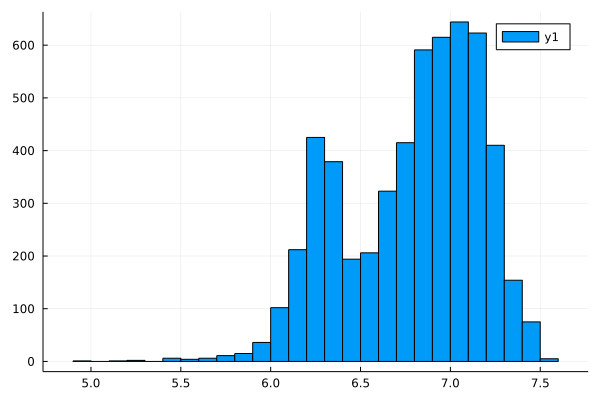

In [36]:
using CSV
using DataFrames
run_df = CSV.read(joinpath(dirname(abspath(@__FILE__)), "..", "sample", "HDB5_compressed.csv"), DataFrames.DataFrame)

signal_names = ["TOK", "SHOT", "AMIN", "KAPPA", "DELTA", "NEL", "ZEFF", "TAUTH", "RGEO", "BT", "IP","PL", "PNBI", "ENBI", "PICRH", "PECRH", "POHM", "MEFF", "VOL", "AREA", "WTH","CONFIG"]
run_df = run_df[:,signal_names]
run_df = run_df[DataFrames.completecases(run_df), :]
println(length(run_df[:,"SHOT"]))

run_df = run_df[(run_df.TOK.=="JET"),:]
histogram(log10.(run_df[:,"PL"]))


B0 ➡ missing
R0 ➡ missing
Z0 ➡ 0.0 [m]
area ➡ missing
field_null_surface ➡ 0.25
ip ➡ missing
ngrid ➡ 129
symmetric ➡ missing
volume ➡ missing
x_point ➡ missing
βn ➡ missing
δ ➡ missing
κ ➡ missing
ϵ ➡ missing


1

2

3

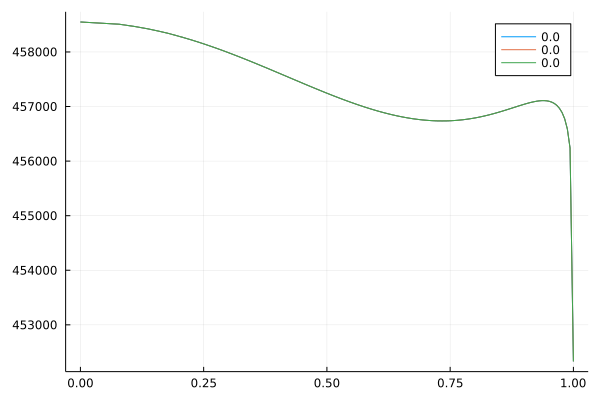

In [59]:
par = Parameters(:ITER,init_from=:ods) # this dd only had equilibrium
dd_qed = IMAS.dd()
display(par.equilibrium)


FUSE.init(dd_qed,par); 
currentactor = FUSE.QEDcurrentActor(dd_qed)
p=plot()
for k in 1:3
    display(k)
    FUSE.step(currentactor,0.1,100,resume=true)
    FUSE.finalize(currentactor);
    dd.global_time=dd.equilibrium.time[end]
    plot!(p,dd.equilibrium.time_slice[].profiles_1d.rho_tor_norm, dd.equilibrium.time_slice[].profiles_1d.j_tor,label=@ddtime(dd.equilibrium.time))
end

display(p)

In [10]:
using CSV 

using DataFrames


function load_dataframe(filename :: String)
    return CSV.read(filename, DataFrames.DataFrame)
end

function mean(x)
    return sum(x)/length(x)
end

function R_squared(x,y)
    return 1 - sum((x .- y).^2) / sum((x .- mean(x)).^2)
end

function mean_relative_error(x,y)
    return 100 * sum(abs.((x .- y)) ./ abs.(x)) / length(x)
end

"""
    plot_x_y_regression(dataframe::DataFrame
     x_name :: Union{String, Symbol},
     y_name :: Union{String, Symbol})
Plots x vs y regression plot in log-form on x_name and y_name in the dataframe
"""

function plot_x_y_regression(dataframe::DataFrames.DataFrame, x_name::Union{String, Symbol}, y_name::Union{String, Symbol})
    if x_name == "TAUTH"
        x_ylim = [5e-3,1e1]
    else
        x_ylim = [minimum(abs.(dataframe[:, x_name]))/1e1, maximum(dataframe[:, x_name])*1e1]
    end
    DataFrames.dropmissing!(dataframe)
    dataframe = dataframe[(dataframe.TOK .!= "ASDEX"),:]
    tok_list = unique(dataframe[:, "TOK"])
    for tok in tok_list
        x = dataframe[(dataframe.TOK .== tok),:][:, x_name]
        y = dataframe[(dataframe.TOK .== tok),:][:, y_name]
        MRE = round(mean_relative_error(x, y), digits=2)
        plot(x, y, seriestype = :scatter, xaxis = :log, yaxis = :log, ylim = x_ylim, xlim = x_ylim, xlabel = "τ_exp [s]", xguidefontsize=15,yguidefontsize=15, ylabel = "τ_FUSE [s]", legendfont=font(14) , xtickfontsize=13, ytickfontsize=13, label = "MRE:$MRE% $tok $(length(x))", size=(800,800))
        plot!([0.5 * x_ylim[1], 0.5 * x_ylim[2]], [2 * x_ylim[1], 2 * x_ylim[2]], linestyle = :dash, color="black", label = "+50%")
        plot!([2 * x_ylim[1], 2 * x_ylim[2]], [0.5 * x_ylim[1], 0.5 * x_ylim[2]], linestyle = :dash, color="black", label = "-50%", legend = :topleft)
        display(plot!([x_ylim[1], x_ylim[2]], [x_ylim[1], x_ylim[2]], label = nothing))
    end
    R²=round(R_squared(dataframe[:, x_name], dataframe[:, y_name]),digits=2)
    MRE = round(mean_relative_error(dataframe[:, x_name], dataframe[:, y_name]), digits=2)
    plot(dataframe[:, x_name], dataframe[:, y_name], seriestype = :scatter, xaxis = :log, yaxis = :log, ylim = x_ylim, xlim = x_ylim, xlabel = "τ_exp [s]", ylabel = "τ_FUSE [s]", xguidefontsize=15 ,yguidefontsize=15, legendfont=font(14), label = "MRE:$MRE% all toks", size=(800,800))
    plot!([0.5 * x_ylim[1], 0.5 * x_ylim[2]], [2 * x_ylim[1], 2 * x_ylim[2]], linestyle = :dash, color="black", label = "+50%")
    plot!([2 * x_ylim[1], 2 * x_ylim[2]], [0.5 * x_ylim[1], 0.5 * x_ylim[2]], linestyle = :dash, color="black", label = "-50%", legend = :topleft)
    display(plot!([x_ylim[1], x_ylim[2]], [x_ylim[1], x_ylim[2]], label = nothing))
    println("R² = $(R²), mean_relative_error = $MRE)")
end

df = load_dataframe("/Users/timslendebroek/test_output/dataframe_50_each.csv")

plot_x_y_regression(df, "TAUTH", "τ_fuse")

LoadError: UndefVarError: font not defined

In [12]:
function neutron_density_source(dd::IMAS.dd; neutron_density_cutoff = 0., neutron_fraction_cutoff = missing, r_z_resolution=50)
    cs1d_fusion = IMAS.DT_fusion_source!(dd, return_source=true)
    neutron_density_rate = cs1d_fusion.electrons.energy .+ cs1d_fusion.total_ion_energy ./ IMAS.constants.k_B * 3.5e6
    eqt = dd.equilibrium.time_slice[]
    psi_eq = eqt.profiles_1d.psi
    
    neutron_density_rate_psi_eq = IMAS.interp1d(cs1d_fusion.grid.psi, neutron_density_rate).(psi_eq)

    display(heatmap(neutron_density_rate_psi_eq))
    
    if neutron_fraction_cutoff != missing
        psi_cutoff_idx = argmin(abs.(neutron_density_rate_psi_eq .- maximum(neutron_density_rate_psi_eq)  * neutron_fraction_cutoff))
    else
        psi_cutoff_idx = argmin(abs.(neutron_density_rate_psi_eq .-  neutron_density_cutoff))
    end
    
    for (psi_idx,psi_level) in enumerate(psi_eq[1:psi_cutoff_idx])
        pr, pz = IMAS.flux_surface(eqt, psi_level, true)
        neutron_rate_level = neutron_density_rate_psi_eq[psi_idx]
    end

    

end

#neutron_density_source(dd)
dd.core_sources= IMAS.core_sources()


LoadError: UndefVarError: IMAS not defined

In [13]:
par = Parameters(:ITER, init_from=:ods)
dd = IMAS.dd()

FUSE.init_equilibrium(dd, par)
#FUSE.init_build(dd, par)
FUSE.init_core_profiles(dd,par)

IMAS.DT_fusion_source!(dd)
display(plot(dd.core_sources))
display(plot(dd.equilibrium))
display(plot(dd.core_profiles))

cs1d_fusion = dd.core_sources.source[1].profiles_1d[]
total_energy_fusion = cs1d_fusion.electrons.energy .+ cs1d_fusion.total_ion_energy
eqt = dd.equilibrium.time_slice[]
psi_eq = eqt.profiles_1d.psi

neutron_source_psi_eq = IMAS.interp1d(cs1d_fusion.grid.psi, total_energy_fusion).(psi_eq) ./ IMAS.constants.k_B*3.5e6
neutron_fusion = total_energy_fusion ./ (IMAS.constants.e * 3.5e6)

display(plot(psi_eq, neutron_source_psi_eq.*eqt.profiles_1d.volume,yaxis=:log,ylim=[maximum(neutron_source_psi_eq)/1000*eqt.profiles_1d.volume[end],maximum(neutron_source_psi_eq)*eqt.profiles_1d.volume[end]]))
psi_cutoff_100_idx = argmin(abs.(neutron_source_psi_eq .- maximum(neutron_source_psi_eq)/100))
psi_cutoff_10_idx = argmin(abs.(neutron_source_psi_eq .- maximum(neutron_source_psi_eq)/10))


psi_maximum_idx = argmin(abs.(neutron_source_psi_eq .- maximum(neutron_source_psi_eq)))
display(@show psi_cutoff)
NEUTRONRATERZ = IMAS.interp1d(psi_eq,neutron_source_psi_eq).(eqt.profiles_2d[1].psi)

#RGRID = dim1
#ZGRID = dim2
#CORE_PLASMA_MASK = [PolygonOps.inpolygon((r, z), collect(zip(pr,pz))) for r in RGRID, z in ZGRID]

#display(contour(NEUTRONRATERZ))

heatmap(eqt.profiles_2d[1].grid.dim1,eqt.profiles_2d[1].grid.dim2,transpose(NEUTRONRATERZ))
display(plot!(eqt))
#pr,pz=IMAS.flux_surface(eqt,psi_eq[end], true)


#display(heatmap(eqt.profiles_2d[1].psi))
#psi_r_z = eqt.profiles_2d.psi
pr,pz=IMAS.flux_surface(eqt,psi_eq[psi_maximum_idx], true)
plot(pr,pz,label="maximum neutron creation")
pr,pz=IMAS.flux_surface(eqt,psi_eq[psi_cutoff_10_idx], true)
plot!(pr,pz,label="1/10 maximum")
pr,pz=IMAS.flux_surface(eqt,psi_eq[psi_cutoff_100_idx], true)
plot!(pr,pz,label="1/100 maximum")
pr,pz=IMAS.flux_surface(eqt,psi_eq[end], true)
plot!(pr,pz,label="plasma boundary")

LoadError: UndefVarError: Parameters not defined

In [15]:
dataframe = FUSE.validation_workflow(50, show_dd_plots=true,save_directory="/Users/timslendebroek/test_output");


LoadError: UndefVarError: FUSE not defined

In [24]:
# Volume and Area scaled up
import AD_EPEDNN
#x0 : table with parameters
#y0 : is observable
# power law fit


#= ================================================== =#
# functors for EPED1NNmodel objects
#= ================================================== =#
using LinearAlgebra
function power_law_fit(A, b, λ = 0)
    A = vcat(transpose(b .* 0.0 .+ 1), log10.(abs.(A)))
    b = log10.(abs.(b))
    if λ > 0
        A = transpose(A)
        reg_solve(A, b, λ) = inv(A' * A + λ * I) * A' * b
        p = reg_solve(A, b, λ)
    else
        b = transpose(b)
        p = transpose(b / A)
    end
    return p
end

col_names = ["TOK","AMIN","KAPPA","DELTA","NEL","NEV","ZEFF","TAUTH","HIPB98Y2","RGEO","BT","IP","PNBI","PICRH","PECRH","POHM","MEFF","VOL","AREA","WTH"]

#df2 = df2_no_jet

n = length(df2.TOK)

y0 = Vector{Float64}(df2[1:n,"NEV"] ./ df2[1:n,"NEL"])
x0 = transpose(hcat(Vector{Float64}(df2[1:n,"AMIN"]), (Vector{Float64}(df2[1:n,"DELTA"] .+ 1)), Vector{Float64}(df2[1:n,"KAPPA"]), Vector{Float64}(df2[1:n,"RGEO"])))
x0 = transpose(hcat(Vector{Float64}(df2[1:n,"RGEO"]),Vector{Float64}(df2[1:n,"VOL"]) ))


#@show y0, size(y0)
#@show x0, size(x0)
for lambda in [0.1,1,10,1e2,1e3]
    p = power_law_fit(x0,y0,lambda)
    @show p
    y1 = transpose(AD_EPEDNN.power_law_fit_eval(p,x0))
    #plot(y1 .- y0,seriestype=:scatter)
    display(histogram((Vector{Float64}(df2[:,"NEV"]) .- (y1 .* Vector{Float64}(df2[:, "NEL"])))./Vector{Float64}(df2[:,"NEV"]),label="$lambda"))
end

LoadError: ArgumentError: Package AD_EPEDNN not found in current path:
- Run `import Pkg; Pkg.add("AD_EPEDNN")` to install the AD_EPEDNN package.
